# Routine to look at when soundings are available at PABR site


https://weather.uwyo.edu/upperair/sounding.html

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
matplotlib.rcParams.update({'font.size': 12})
import pandas as pd
from datetime import datetime

import sys
sys.path.append('./scripts/')

from LIB_sounding_date_checks import grab_sounding_dates

### Look at when requested [Wyoming Upper Air sounding](https://weather.uwyo.edu/upperair/sounding.html) data was available

In [2]:
# naming convention used for files, with {} = YYYY
#======================================================================
csv_name = './sounding_checks/checked_{}0101Z00_{}1231Z23_hourly6.csv'
#======================================================================

# function to plot dots when soundings where found
def plot_soundingexist(doy, sou, year, s = 1, c = 'k', alpha = 0.5, marker='.'):
    doy_soundings = doy[sou==1]
    year_soundings = np.full_like(doy_soundings, year)
    plt.scatter(doy_soundings, year_soundings, s=s, c=c, alpha=alpha, marker=marker)
    

### Plot when soundings are available from local .csv files

In [10]:
# julian day ranges for each season
season_bounds = {}
season_bounds['winter'] = {'start': 0,   'end': 91}
season_bounds['spring'] = {'start': 91,  'end': 182}
season_bounds['summer'] = {'start': 182, 'end': 274}
season_bounds['autumn'] = {'start': 274, 'end': 366}

 >>> save as ./figures/sounding_availability_1992-2020_[12]Z_.png


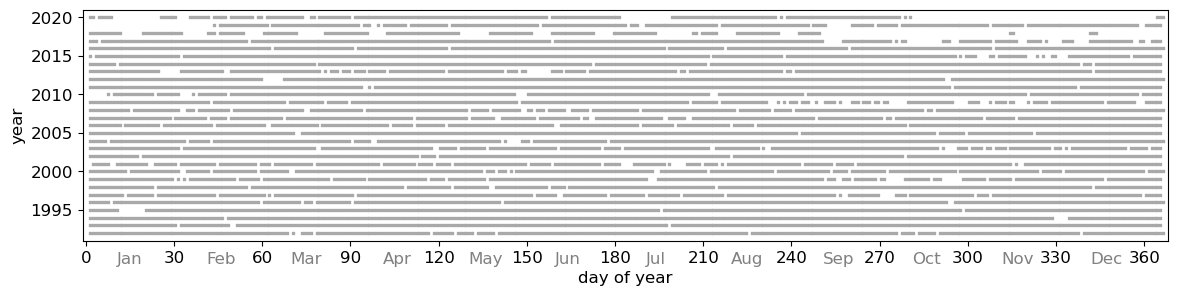

In [53]:

#=============================
years = np.arange(1992, 2021)
hours = [12]
show_season_periods = False
#=============================


# create figure
fig, ax = plt.subplots(figsize=(14,3))

# generate mid month labels
label_doys = []
label_names = []
for month_num in range(1,13):
    if month_num < 6:
        midmonth = 15
    else:
        midmonth = 12
    label_doys.append(int(datetime(year = 2020, month = month_num, day = midmonth).strftime('%j')))
    label_names.append(datetime(year = 2020, month = month_num, day = midmonth).strftime('%B')[:3])
for ll, label in enumerate(label_names):
    ax.text(label_doys[ll], years[0]-4, label, c='gray', horizontalalignment='center')
    
    
if show_season_periods == True:
    
    # julian day ranges for each season
    season_bounds = {}
    season_bounds['winter'] = {'start': 0,   'end': 91}
    season_bounds['spring'] = {'start': 91,  'end': 182}
    season_bounds['summer'] = {'start': 182, 'end': 274}
    season_bounds['autumn'] = {'start': 274, 'end': 366}

    # plot sounding existence for multiple years
    for year in years:
        if (year > 1996)&(year < 2017):
            color = 'lightgray'
        else:
            color = 'darkgrey'
        plot_soundingexist(*grab_sounding_dates(csv = csv_name.format(year,year), hours = hours), 
                           s=2, c=color, alpha=1, marker='s')

    # outline season boundaries
    season_colors = ['blue', 'dodgerblue', 'indianred', 'darkorange']
    for ss, season in enumerate(season_bounds.keys()):
        # add Rectangle patches for each season / year range
        rect = patches.Rectangle((season_bounds[season]['start'], 1996.5), season_bounds[season]['end'], 
                                 20, linewidth=1, alpha=0.2, edgecolor='None', facecolor=season_colors[ss])
        ax.add_patch(rect)
        # label season
        mid_season = season_bounds[season]['start']+(season_bounds[season]['end']-season_bounds[season]['start'])/2
        ax.text(mid_season, 2006, season, fontsize=25, weight='bold', color = season_colors[ss], horizontalalignment='center')
    
else:
    # plot sounding existence for multiple years
    for year in years:
        plot_soundingexist(*grab_sounding_dates(csv = csv_name.format(year,year), hours = hours), 
                           s=2, c='darkgrey', alpha=1, marker='s')
        
    
# plot params    
ax.set_xlim(-1,368)
ax.set_ylim(years[0]-1, years[-1]+1)
ax.set_xticks(np.arange(0,361,30))
ax.set_xlabel('day of year')
ax.set_ylabel('year')

# save
savename = f'./figures/sounding_availability_{years[0]}-{years[-1]}_{hours}Z_{"SeasonLabels"*show_season_periods}.png'
print(f' >>> save as {savename}')
fig.savefig(savename, transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)  

### plot by season when soundings are available

353 soundings in 1992 // Win: 86 // Spr: 87 // Sum: 91 // Aut: 88 //
361 soundings in 1993 // Win: 87 // Spr: 91 // Sum: 91 // Aut: 92 //
359 soundings in 1994 // Win: 89 // Spr: 91 // Sum: 92 // Aut: 87 //
354 soundings in 1995 // Win: 81 // Spr: 91 // Sum: 91 // Aut: 91 //
358 soundings in 1996 // Win: 85 // Spr: 90 // Sum: 92 // Aut: 90 //
340 soundings in 1997 // Win: 85 // Spr: 86 // Sum: 82 // Aut: 87 //
355 soundings in 1998 // Win: 88 // Spr: 85 // Sum: 91 // Aut: 91 //
330 soundings in 1999 // Win: 84 // Spr: 87 // Sum: 82 // Aut: 77 //
344 soundings in 2000 // Win: 83 // Spr: 87 // Sum: 85 // Aut: 88 //
329 soundings in 2001 // Win: 80 // Spr: 84 // Sum: 76 // Aut: 89 //
360 soundings in 2002 // Win: 89 // Spr: 89 // Sum: 91 // Aut: 91 //
336 soundings in 2003 // Win: 87 // Spr: 85 // Sum: 86 // Aut: 78 //
352 soundings in 2004 // Win: 86 // Spr: 81 // Sum: 92 // Aut: 92 //
359 soundings in 2005 // Win: 88 // Spr: 91 // Sum: 91 // Aut: 89 //
349 soundings in 2006 // Win: 84 /

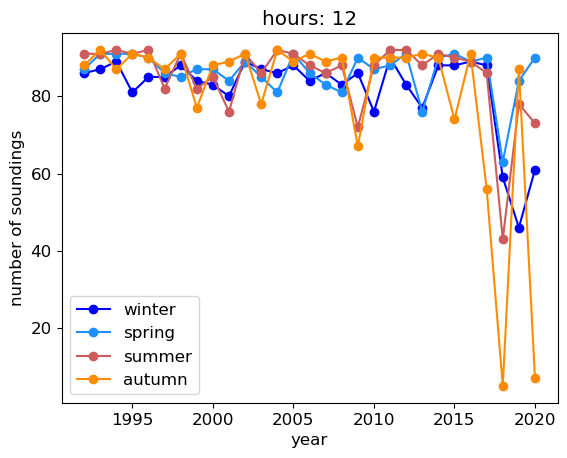

In [57]:
# naming convention used for files, with {} = YYYY
#======================================================================
csv_name = './sounding_checks/checked_{}0101Z00_{}1231Z23_hourly6.csv'

hours = [12]
#======================================================================

Win_num_all = np.array([])
Spr_num_all = np.array([])
Sum_num_all = np.array([])
Aut_num_all = np.array([])

seasons = ['winter', 'spring', 'summer', 'autumn']
colors = ['blue', 'dodgerblue', 'indianred', 'darkorange']

# julian day ranges for each season
season_bounds = {}
season_bounds['winter'] = {'start': 0,   'end': 91}
season_bounds['spring'] = {'start': 91,  'end': 182}
season_bounds['summer'] = {'start': 182, 'end': 274}
season_bounds['autumn'] = {'start': 274, 'end': 366}

num_soundings = {}
num_soundings['year'] = np.array([])
num_soundings['all'] = np.array([])
for season in seasons:
    num_soundings[season] = np.array([])
#     num_soundings['spring'] = np.array([])
#     num_soundings['summer'] = np.array([])
#     num_soundings['autumn'] = np.array([])

for year in years:
        
    doy, sou, year = grab_sounding_dates(csv=f'./sounding_checks/checked_{year}0101Z00_{year}1231Z23_hourly6.csv', 
                                         hours=hours)
    num_soundings['year'] = np.append(num_soundings['year'], year)
    

    # find number of soundings available in each season
    num_soundings['all'] = np.append(num_soundings['all'], np.sum(sou))
    for season in ['winter', 'spring', 'summer', 'autumn']:
        num_soundings[season] = np.append(num_soundings[season], 
                                          np.sum(sou[(doy>=season_bounds[season]['start'])&
                                                     (doy<season_bounds[season]['end'])]))
        
    print(f"{np.sum(sou):.0f} soundings in {year} // Win: {num_soundings['winter'][-1]:.0f} // Spr: {num_soundings['spring'][-1]:.0f} // Sum: {num_soundings['summer'][-1]:.0f} // Aut: {num_soundings['autumn'][-1]:.0f} //")

# plot soundings available each season by year
fig, ax = plt.subplots()
for ss, season in enumerate(seasons):
    ax.plot(years, num_soundings[season], marker='o', c=colors[ss], label=season)

# legend
ax.set_xlabel('year')
ax.set_ylabel('number of soundings')
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)

# title
hour_title = ''
for hour in hours:
    hour_title+=str(hour)    
plt.title(f'hours: {hour_title}')


# save
savename = f'./figures/num_soundings_seasonal_{years[0]}-{years[-1]}_{hours}Z.png'
print(f' >>> save as {savename}')
fig.savefig(savename, transparent=True, bbox_inches='tight', pad_inches=0, dpi=300) 